# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 

import missingno as msno
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')

Load Libraries-Done


# Load the dataset

In [2]:
pima_data = pd.read_csv('diabetes_data.csv')

In [3]:
pima_data.head()

preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive

In [4]:
# we rename the columns
pima_df = pima_data.rename(columns = {'preg': 'pregnancies', 'plas': 'glucose', 'pres': 'bloodpressure', 'skin': 'skinthickness', 'insu': 'insulin', 'mass': 'bmi', 'pedi': 'DiabetesPedigreeFunction', 'class': 'results'}, inplace = False)

In [5]:
pima_df.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  age          results  
0                     0.627   50  tested_positive  
1                     0.351   31  tested_negative  
2                     0.672   32  tested_positive  
3                     0.167   21  tested_negative  
4                     2.288   33  tested_positive

In [6]:
pima_df.tail()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  age          results  
763                     0.171   63  tested_negative  
764                     0.340   27  tested_negative  
765                     0.245   30  tested_negative  
766                     0.349   47  tested_positive  
767                     0.315   23  tested_negative

In [7]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   results                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [8]:
pima_df.describe().T

count        mean         std     min       25%  \
pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
glucose                   768.0  120.894531   31.972618   0.000  99.00000   
bloodpressure             768.0   69.105469   19.355807   0.000  62.00000   
skinthickness             768.0   20.536458   15.952218   0.000   0.00000   
insulin                   768.0   79.799479  115.244002   0.000   0.00000   
bmi                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
age                       768.0   33.240885   11.760232  21.000  24.00000   

                               50%        75%     max  
pregnancies                 3.0000    6.00000   17.00  
glucose                   117.0000  140.25000  199.00  
bloodpressure              72.0000   80.00000  122.00  
skinthickness              23.0000   32.00000   99.00  
insulin                    30.5000  127.25000  846.00  
bmi                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
age                        29.0000   41.00000   81.00

In [9]:
pima_df.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
DiabetesPedigreeFunction    float64
age                           int64
results                      object
dtype: object

In [10]:
pima_df.shape

(768, 9)

In [11]:
pima_df.value_counts()

pregnancies  glucose  bloodpressure  skinthickness  insulin  bmi   DiabetesPedigreeFunction  age  results        
0            57       60             0              0        21.7  0.735                     67   tested_negative    1
             67       76             0              0        45.3  0.194                     46   tested_negative    1
5            103      108            37             0        39.2  0.305                     65   tested_negative    1
             104      74             0              0        28.8  0.153                     48   tested_negative    1
             105      72             29             325      36.9  0.159                     28   tested_negative    1
                                                                                                                    ..
2            84       50             23             76       30.4  0.968                     21   tested_negative    1
             85       65             0              0

In [12]:
# Checking Null Values
pima_df.isnull().sum()

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
DiabetesPedigreeFunction    0
age                         0
results                     0
dtype: int64

In [13]:
pima_df.isnull().all()

pregnancies                 False
glucose                     False
bloodpressure               False
skinthickness               False
insulin                     False
bmi                         False
DiabetesPedigreeFunction    False
age                         False
results                     False
dtype: bool

In [14]:
pima_df.isnull().any()

pregnancies                 False
glucose                     False
bloodpressure               False
skinthickness               False
insulin                     False
bmi                         False
DiabetesPedigreeFunction    False
age                         False
results                     False
dtype: bool

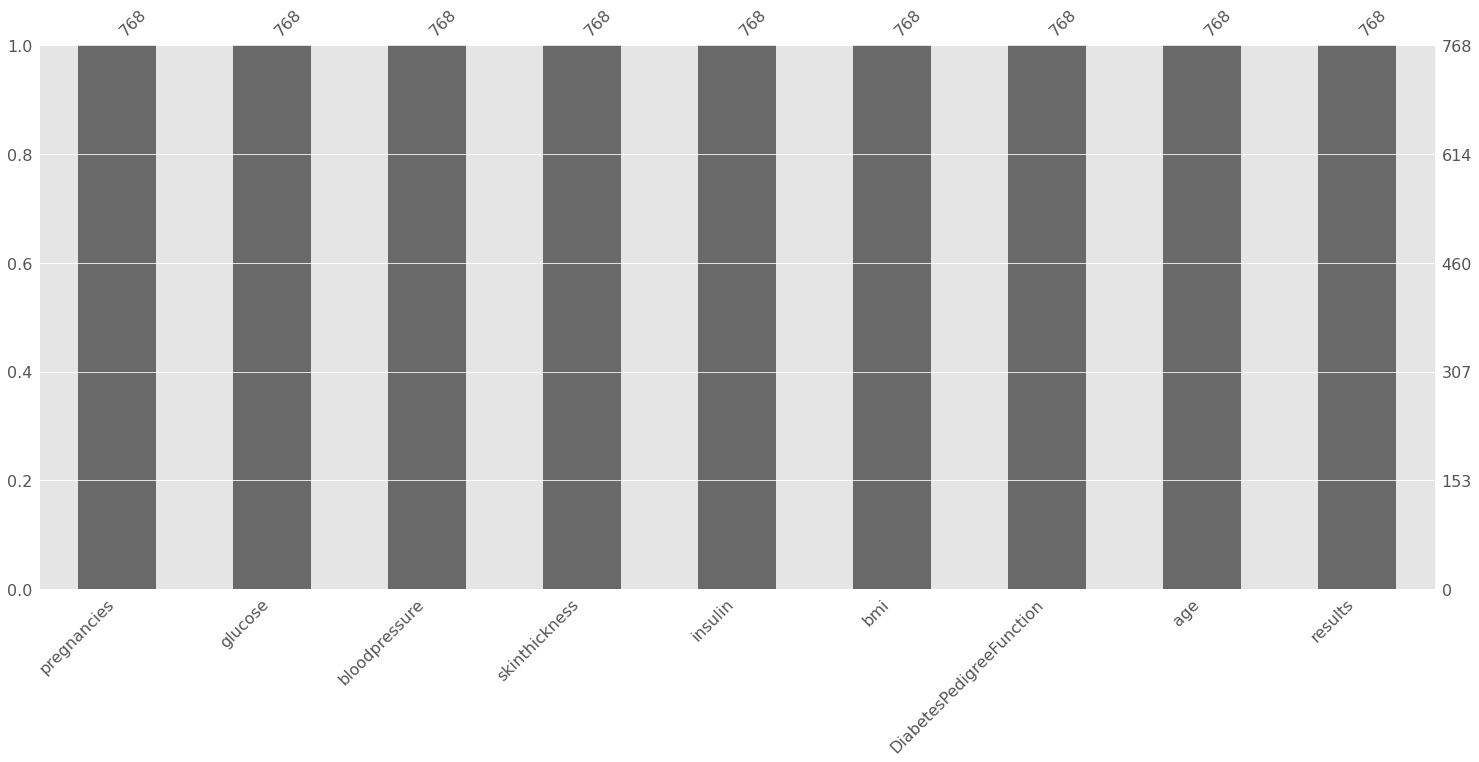

In [15]:
# visualize null values
msno.bar(pima_df)
plt.show()

###### Observations

Data set contains women with an average of 4pregnancies and maximum of 17.
Features like Glucose, BloodPressure, SkinThickness, and Insulin have minimum values as 0 which might be data input errors and should explore it further.
Difference between maximum value for features like SkinThickness, Insulin and Age and 3rd quartile which suggest ,there might be outliers present in the data.
Average age of women in the dataset is33 years and median is29.


All variables are integer or float types and one object.
There are no missing values in the dataset.
Outcome is our Target Variable.

# Exploratory Data Analysis

In [16]:
pima_df["results"] = pima_df["results"].astype('category')
pima_df.dtypes

pregnancies                    int64
glucose                        int64
bloodpressure                  int64
skinthickness                  int64
insulin                        int64
bmi                          float64
DiabetesPedigreeFunction     float64
age                            int64
results                     category
dtype: object

In [17]:
# lets encode the results column 1 to represent tested_positive and 0 tested_negative
pima_df["results"] = pima_df["results"].cat.codes
pima_df.head()

pregnancies  glucose  bloodpressure  skinthickness  insulin   bmi  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  age  results  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

I believe that it is impossible for the following columns to have a value of zero. On these columns, a value of zero does not make sense and thus indicates missing value or rather invalid zero(0) value. The columns are: Glucose, BloodPressure, SkinThickness, Insulin, BMI

In [18]:
# Handling the missing(o) values
col=['glucose' ,'bloodpressure' ,'skinthickness', 'insulin' ,'bmi']

In [19]:
for i in col:
    pima_df[i].replace(0,pima_df[i].mean(),inplace=True)

In [20]:
pima_df.to_csv("clean_diabetes_data.csv",index=False)

##### Correlation Matrix

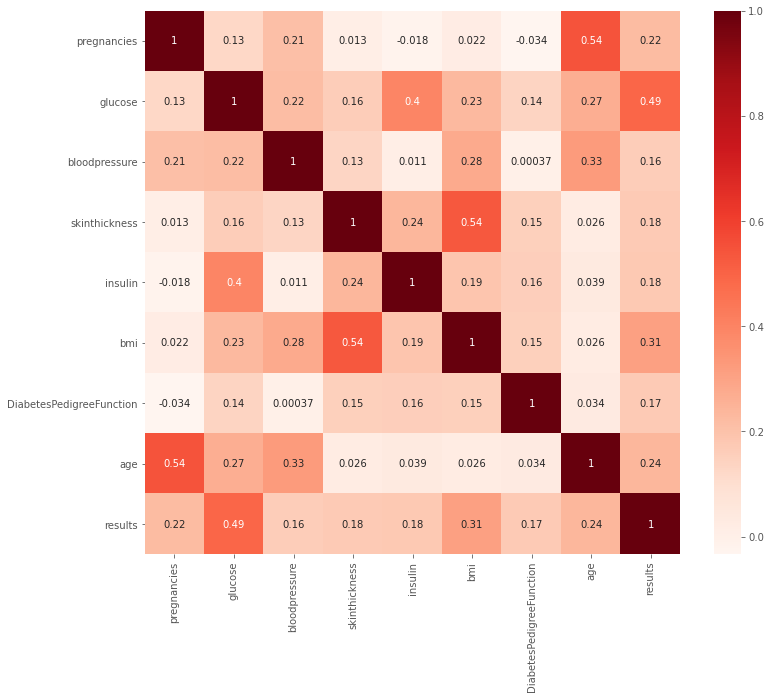

In [21]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pima_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
#Correlation with output variable
cor_target = abs(cor["results"])
cor_target 

pregnancies                 0.221898
glucose                     0.492908
bloodpressure               0.162986
skinthickness               0.175026
insulin                     0.179185
bmi                         0.312254
DiabetesPedigreeFunction    0.173844
age                         0.238356
results                     1.000000
Name: results, dtype: float64

In [23]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

pregnancies    0.221898
glucose        0.492908
bmi            0.312254
age            0.238356
results        1.000000
Name: results, dtype: float64

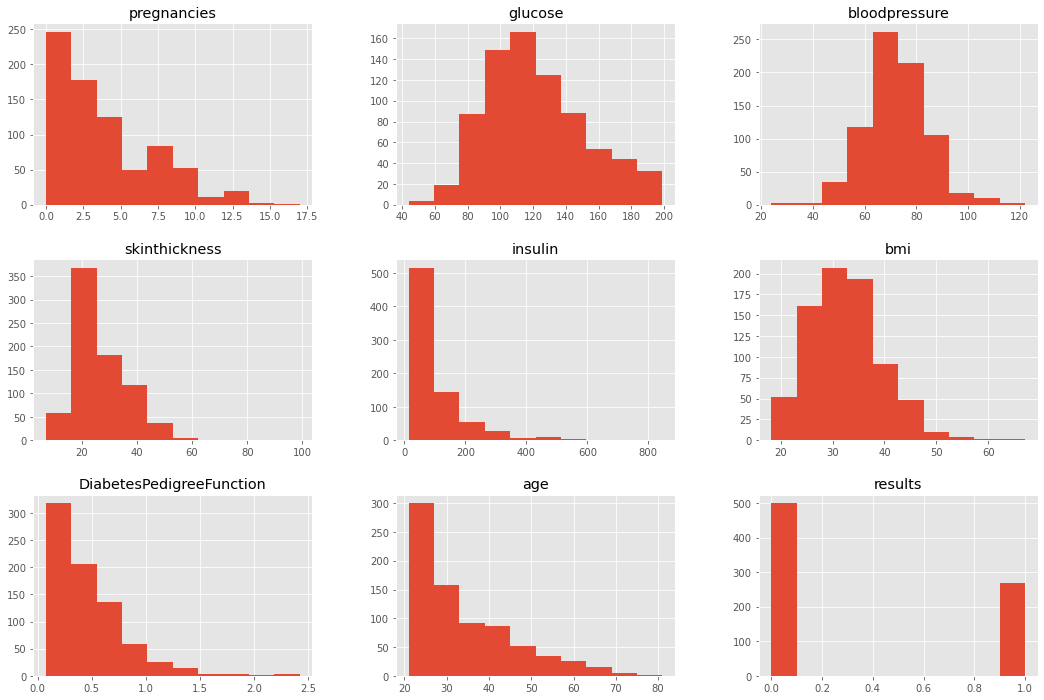

In [24]:
pima_df.hist(figsize=(18,12))
plt.show()

In [25]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    sns.set_palette(sns.color_palette("Set1", 8))
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',ax=ax_box)
    ax_box.set(xlabel='')
    
    # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True)
    sns.set_palette(sns.color_palette("Set1", 8))
    sns.distplot(data,kde=False,ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

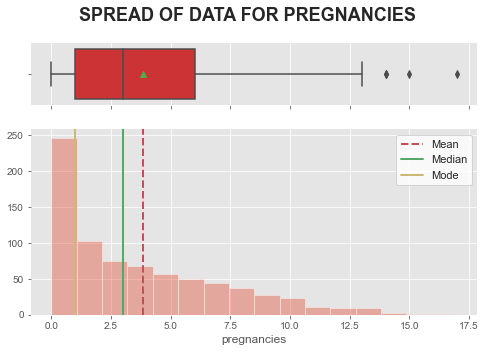

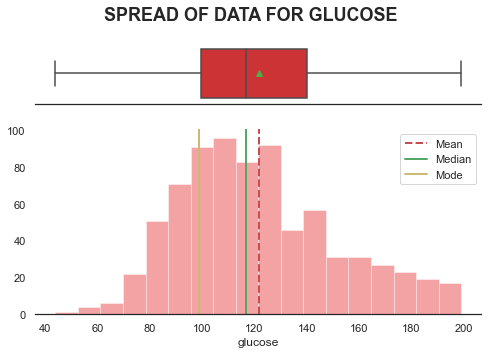

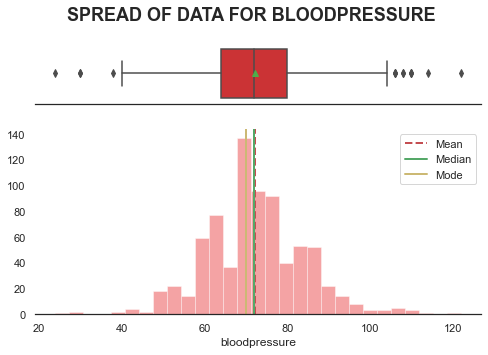

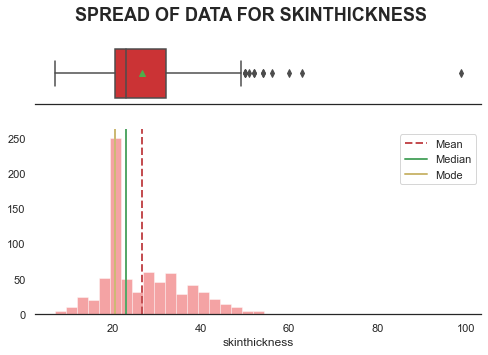

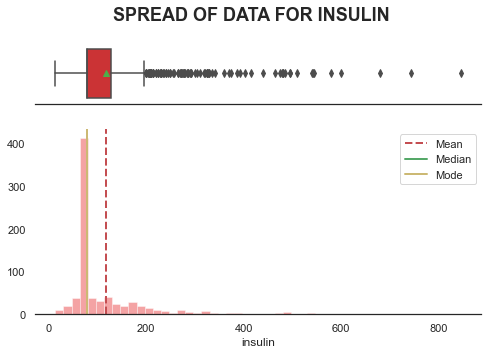

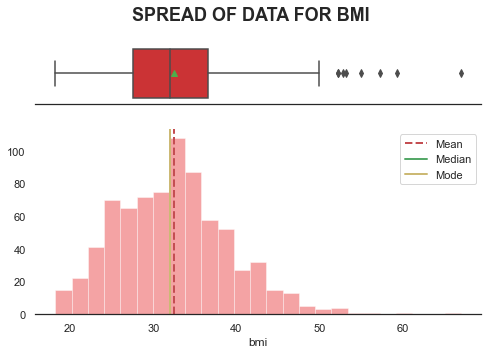

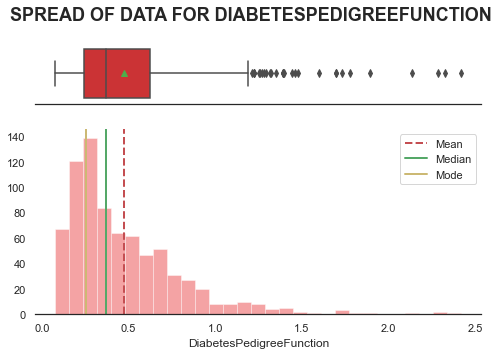

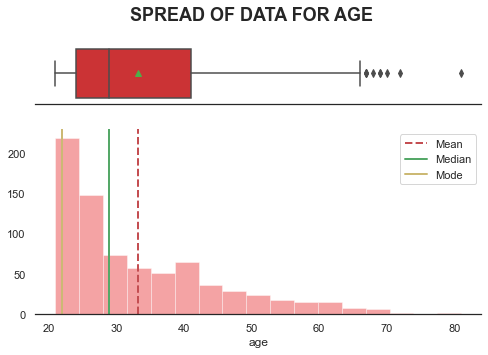

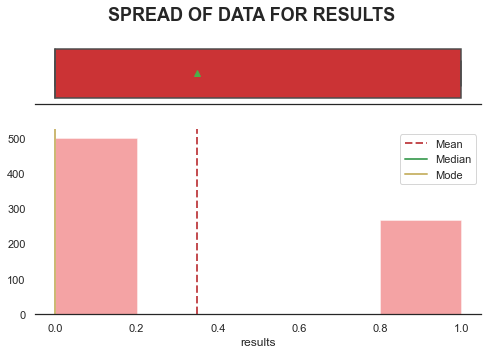

In [26]:
#select all quantitative columns for checking the spread
list_col= pima_df.select_dtypes(include='number').columns.to_list()
for i in range(len(list_col)):
    dist_box(pima_df[list_col[i]])

There is presence of outliers in all columns except for glucose and results column


###### Observations on results

<AxesSubplot:xlabel='results', ylabel='age'>

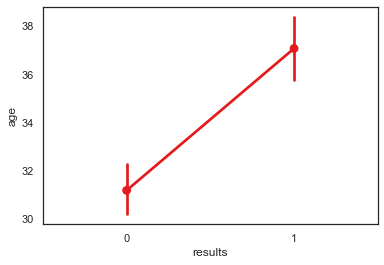

In [27]:
sns.pointplot(x='results', y= 'age', data=pima_df)

<AxesSubplot:xlabel='results', ylabel='pregnancies'>

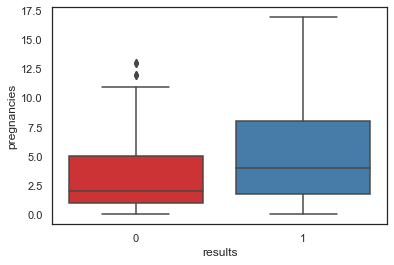

In [28]:
sns.boxplot(x='results',y='pregnancies',data=pima_df)

<AxesSubplot:xlabel='results', ylabel='insulin'>

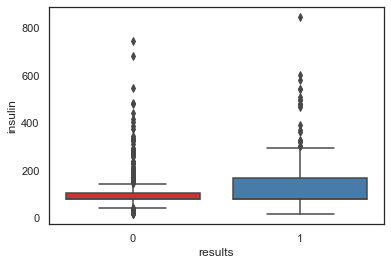

In [29]:
sns.boxplot(x='results',y='insulin',data=pima_df)

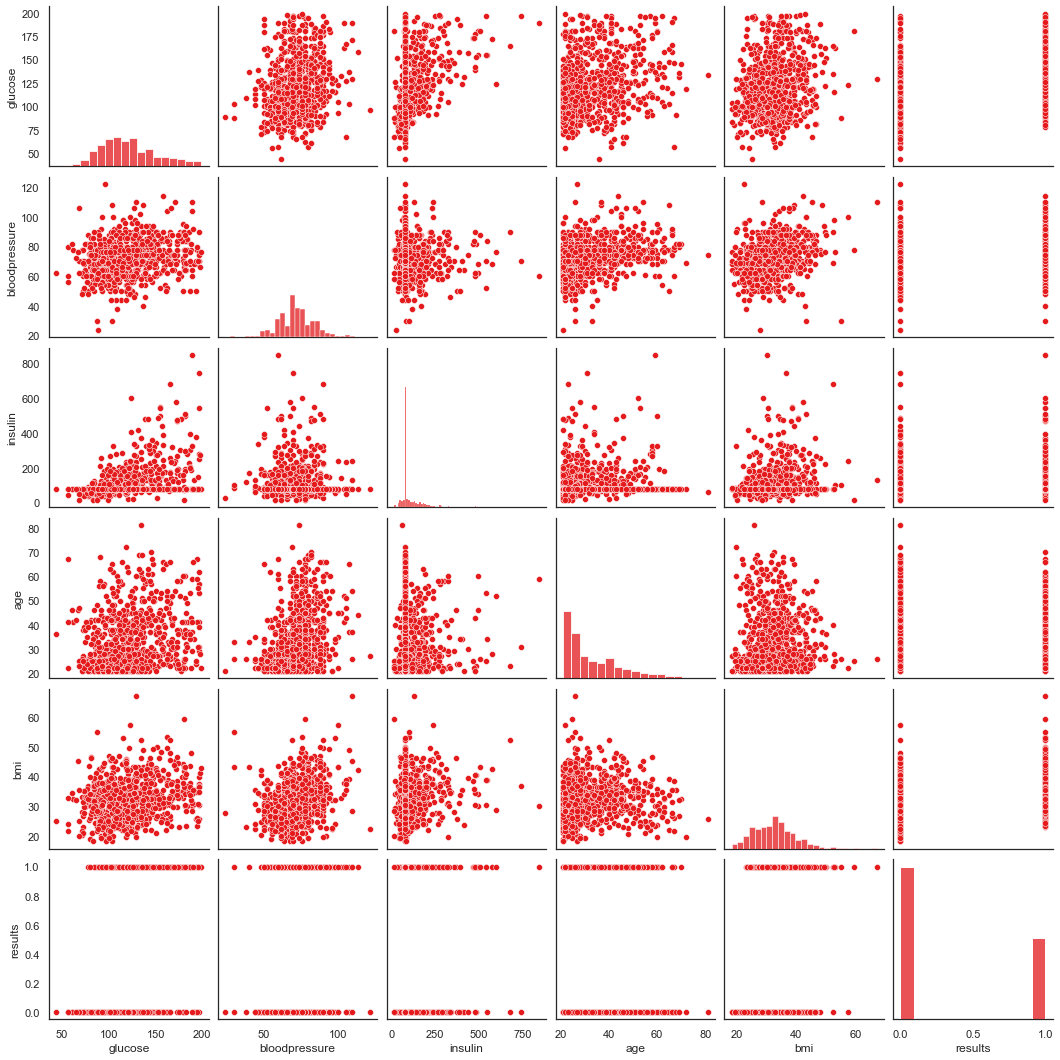

In [30]:
columns = ['glucose','bloodpressure','insulin','age','bmi', 'results']
sns.pairplot(pima_df[columns],palette='Accent')

<AxesSubplot:xlabel='glucose', ylabel='bmi'>

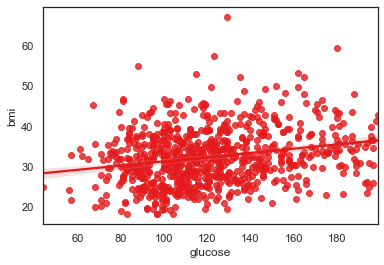

In [31]:
sns.regplot(x='glucose',y='bmi',data=pima_df)

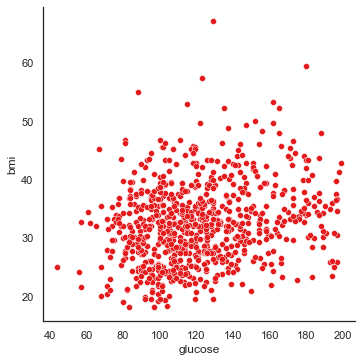

In [32]:
sns.relplot(x='glucose',y='bmi',data=pima_df)

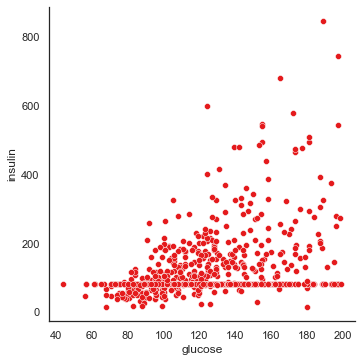

In [33]:
sns.relplot(x='glucose',y='insulin',data=pima_df)

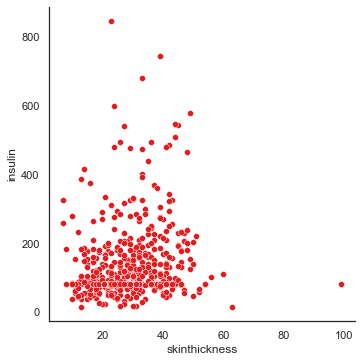

In [34]:
sns.relplot(x='skinthickness',y='insulin',data=pima_df)

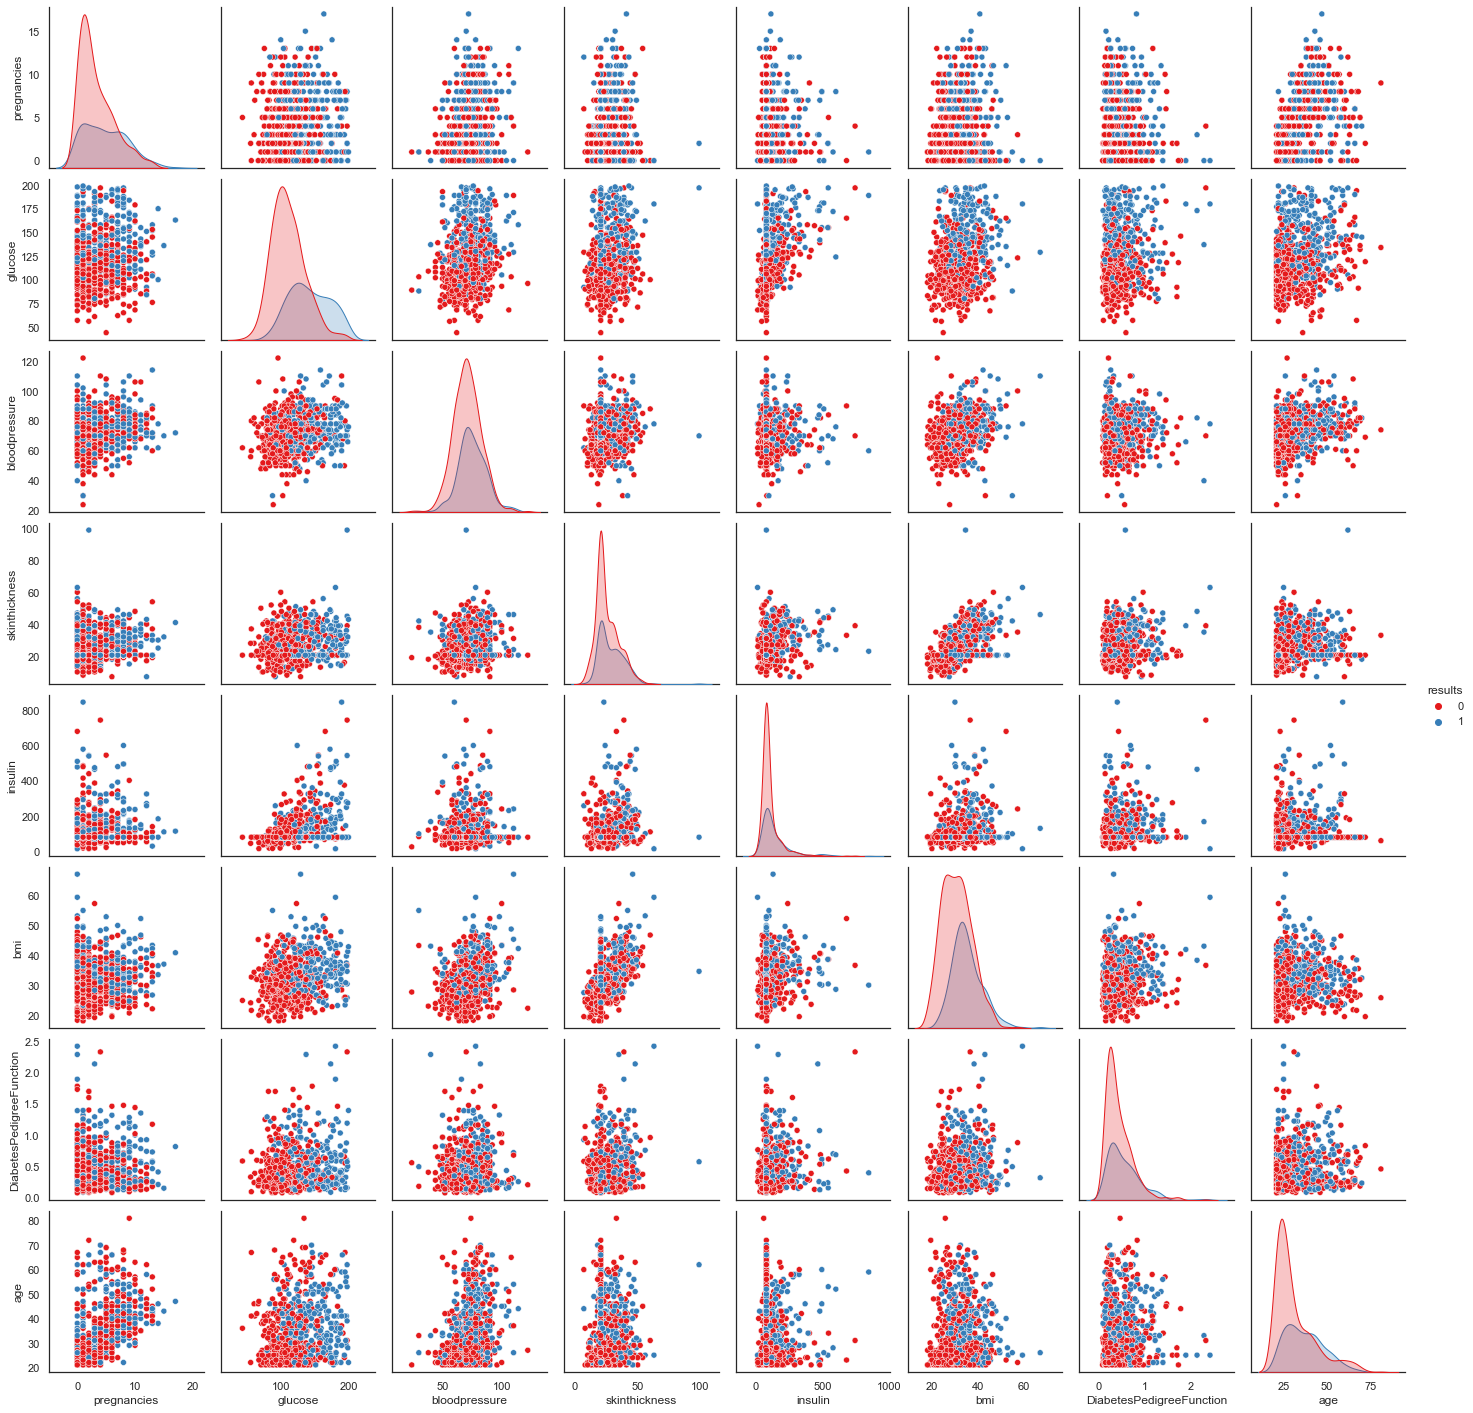

In [35]:
sns.pairplot(pima_df,hue='results')

<AxesSubplot:xlabel='glucose', ylabel='insulin'>

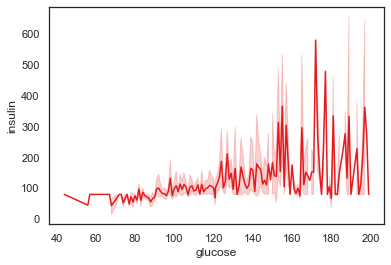

In [36]:
sns.lineplot(x='glucose', y= 'insulin', data=pima_df)

<AxesSubplot:xlabel='glucose', ylabel='insulin'>

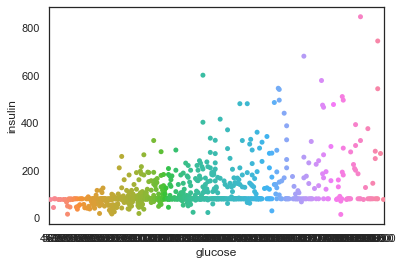

In [37]:
sns.swarmplot(x='glucose', y= 'insulin', data=pima_df)


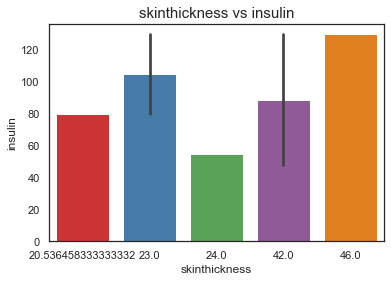

In [38]:
sns.barplot(x="skinthickness", y="insulin", data=pima_df[170:180])
plt.title("skinthickness vs insulin",fontsize=15)
plt.xlabel("skinthickness")
plt.ylabel("insulin")
plt.show()
plt.style.use("ggplot")

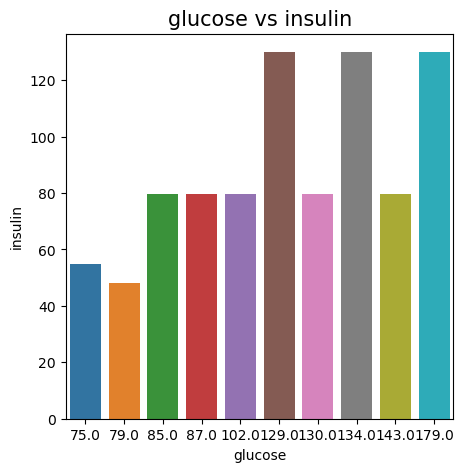

In [39]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="glucose", y="insulin", data=pima_df[170:180])
plt.title("glucose vs insulin",fontsize=15)
plt.xlabel("glucose")
plt.ylabel("insulin")
plt.show()

In [40]:
pima_df.var()

pregnancies                   11.354056
glucose                      926.351048
bloodpressure                146.795798
skinthickness                 92.760798
insulin                     8663.952981
bmi                           47.270761
DiabetesPedigreeFunction       0.109779
age                          138.303046
results                        0.227483
dtype: float64

###### Observation
* There is one outlier with very high skin thickness in diabetic patients.
* There is not much difference between the blood pressure levels of a diabetic and a non-diabetic person.
* Skin thickness doesn't seem to significant in likelihood of diabetes.

###### Insights based on EDA

* Diabetes is more prominent in women with more pregnancies.
* Higher plasma glucose concentration is seen in Women with diabetes.
* Higher levels of insulin is found in women having diabetes.
* Women with diabetes have higher BMI.
* Diabetic women have higher diabetes pedigree function value suggesting family history matters.
* Age does play an important role,Diabetes is more prominent in middle age to older aged women.
* Skin thickness doesnt seem to play any significant role in likelihood of diabetes.

# TRAINING AND TESTING DATA

In [41]:
x = pima_df.drop(columns = 'results')

y = pima_df['results']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [42]:
x_train.head()

pregnancies  glucose  bloodpressure  skinthickness     insulin   bmi  \
603            7    150.0      78.000000      29.000000  126.000000  35.2   
118            4     97.0      60.000000      23.000000   79.799479  28.2   
247            0    165.0      90.000000      33.000000  680.000000  52.3   
157            1    109.0      56.000000      21.000000  135.000000  25.2   
468            8    120.0      69.105469      20.536458   79.799479  30.0   

     DiabetesPedigreeFunction  age  
603                     0.692   54  
118                     0.443   22  
247                     0.427   23  
157                     0.833   23  
468                     0.183   38

In [43]:
y_train.head()

603    1
118    0
247    0
157    0
468    1
Name: results, dtype: int8

# Creation and selection of models

### 1.KNearestNeighbors

In [44]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       107
           1       0.61      0.60      0.60        47

    accuracy                           0.76       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.76      0.76      0.76       154

Confusion Matrix:
 [[89 18]
 [19 28]]
Training Score:
 79.15309446254072
Mean Squared Error:
 0.24025974025974026
R2 score is:
 -0.13302843507655582
75.97402597402598


### 2.Logistic Regression

In [45]:
reg = LogisticRegression()
reg.fit(x_train,y_train)   

y_pred=reg.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       107
           1       0.77      0.64      0.70        47

    accuracy                           0.83       154
   macro avg       0.81      0.78      0.79       154
weighted avg       0.83      0.83      0.83       154

Confusion Matrix:
 [[98  9]
 [17 30]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.16883116883116883
R2 score is:
 0.20381785643269046
83.11688311688312


### 3.DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

y_pred=dtree.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       107
           1       0.57      0.68      0.62        47

    accuracy                           0.75       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.76      0.75      0.75       154

Confusion Matrix:
 [[83 24]
 [15 32]]
Training Score:
 100.0
Mean Squared Error:
 0.2532467532467532
R2 score is:
 -0.1942732153509643
74.67532467532467


### 4.SVC

In [47]:
svc = SVC()
svc.fit(x_train, y_train)

y_pred=svc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.73      0.51      0.60        47

    accuracy                           0.79       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.78      0.79      0.78       154

Confusion Matrix:
 [[98  9]
 [23 24]]
Training Score:
 76.71009771986971
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197
79.22077922077922


### 5.RandomForestClassifier

In [48]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

y_pred=rfc.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       107
           1       0.72      0.66      0.69        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.82       154

Confusion Matrix:
 [[95 12]
 [16 31]]
Training Score:
 100.0
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196
81.81818181818183


# 6.Naive Bayes

In [49]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred=gnb.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154

Confusion Matrix:
 [[92 15]
 [19 28]]
Training Score:
 74.5928338762215
Mean Squared Error:
 0.22077922077922077
R2 score is:
 -0.0411612646649433
77.92207792207793


# 7.Bagging Classifier

In [50]:
bagg = BaggingClassifier()
bagg.fit(x_train,y_train)

y_pred=bagg.predict(x_test)

print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",bagg.score(x_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       107
           1       0.67      0.62      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[93 14]
 [18 29]]
Training Score:
 97.55700325732899
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197
79.22077922077922


* KNearestNeighbors = 75.97402597402598
* Decision Tree = 75.97402597402598
* Logistic Regression = 83.11688311688312
* Random Forest Classifier = 78.57142857142857
* Bagging Classifier = 76.62337662337663
* SVC = 79.22077922077922
* Naive Bayes = 77.92207792207793

# Logistic regression is the best model for prediction

In [51]:
import pickle
# save the model 
pickle.dump(reg, open('Logistic_Regression.pkl', 'wb'))